In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json


In [2]:
#List in all necessary data files 
Bicoastal_Litter = "https://media.githubusercontent.com/media/deirdrebclark/Project1/master/output_data/Bicoastal_Litter.csv"
Bicoastal_Litter = pd.read_csv(Bicoastal_Litter)






In [42]:
#Prepare GDP West files
csv_file = pd.read_csv ("https://media.githubusercontent.com/media/deirdrebclark/Project1/master/output_data/GDP_West.csv", thousands=",")
GDP_West_df = pd.DataFrame(csv_file)

GDP_West_df.columns=['State','2014','2015','2016','2017','2018']
GDP_West_df

,State,2014,2015,2016,2017,2018
0,AK,55523.4,50641.6,49363.4,51803.1,54734.1
1,CA,2395162.3,2553772.2,2657797.6,2819110.7,2997732.8
2,HI,77854.3,82710.0,85843.8,89428.9,93797.9
3,OR,188880.2,203158.9,215050.4,226618.9,239782.8
4,WA,442201.3,470329.3,491358.2,524814.6,565831.0


In [72]:
gdp_wsum=GDP_West_df.sum()
west_gdp=pd.DataFrame(gdp_wsum)
west_gdp

west_final=west_gdp.drop(west_gdp.index[0])
west_final.columns=['West GDP']
west_final

,West GDP
2014,3.15962e+06
2015,3.36061e+06
2016,3.49941e+06
2017,3.71178e+06
2018,3.95188e+06


In [45]:
#Prepare GDP East files 
csv_file = pd.read_csv("https://media.githubusercontent.com/media/deirdrebclark/Project1/master/output_data/GDP_East.csv",thousands=",")
GDP_East_df = pd.DataFrame(csv_file)
GDP_East_df.columns=['State','2014','2015','2016','2017','2018']
GDP_East_df

,State,2014,2015,2016,2017,2018
0,AL,194211.0,200402.7,203829.8,210364.4,221735.5
1,MS,104146.0,105883.4,107096.6,110223.4,114834.2
2,ME,55795.4,57525.7,59753.9,62040.3,64856.0
3,NY,1427495.2,1487754.1,1539555.2,1604133.6,1668866.2
4,VA,463477.6,484216.6,493877.9,509372.8,532892.5
5,LA,238679.5,234299.1,227226.7,239204.3,257287.8
6,MA,473279.0,502858.0,519407.6,540786.0,569488.0
7,MD,352046.7,367096.5,384889.1,394258.6,412584.2
8,FL,839484.1,895146.2,938774.2,985665.4,1039236.4
9,GA,485816.7,513565.6,539525.1,566473.6,592153.4


In [73]:
gdp_esum=GDP_East_df.sum()
east_gdp=pd.DataFrame(gdp_esum)

east_final=east_gdp.drop(east_gdp.index[0])
east_final.columns=['East GDP']
east_final

,East GDP
2014,7.86439e+06
2015,8.15827e+06
2016,8.36352e+06
2017,8.72348e+06
2018,9.19033e+06


In [46]:
#Prepare West Coast population files
csv_file = pd.read_csv("https://media.githubusercontent.com/media/deirdrebclark/Project1/master/output_data/west_pop.csv",thousands=",")
west_pop_df = pd.DataFrame(csv_file)
west_pop_df.columns=['Year','Alaska','California','Hawaii','Oregon','Washington']
west_pop_df

,Year,Alaska,California,Hawaii,Oregon,Washington
0,2014,736732,38802500,1419561,3970239,7061530
1,2015,738432,39144818,1431603,4028977,7170351
2,2016,736855,38654206,1413673,3982267,7073146
3,2017,738565,38982847,1421658,4025127,7169967
4,2018,738516,39148760,1422029,4081943,7294336


In [95]:
west_pop_sum=west_pop_df.sum()
west_pop_final=pd.DataFrame(west_pop_sum)
west_pop_final
ab_west_pop=west_pop_final.drop(west_pop_final.index[0])
ab_west_pop
ab_west_pop.columns=['Population']
ab_west_pop

,Population
Alaska,3689100
California,194733131
Hawaii,7108524
Oregon,20088553
Washington,35769330


In [47]:
#Prepare East Coast population files 
csv_file = pd.read_csv("https://media.githubusercontent.com/media/deirdrebclark/Project1/master/output_data/east_pop.csv", thousands=",")
east_pop = pd.DataFrame(csv_file)

new_east=east_pop.rename(columns={'Unnamed: 0':'Year'})
new_east


,Year,Alabama,Connecticut,Delaware,Florida,Georgia,Louisiana,Maine,Maryland,Massachusetts,Mississippi,New Hampshire,New Jersey,New York,North Carolina,Rhode Island,South Carolina,Texas,Virginia
0,2014,4849377,3596677,935614,19893297,10097343,4649676,1330089,5976407,6745408,2994079,1326813,8938175,19746227,9943964,1055173,4832482,26956958,8326289
1,2015,4858979,3590886,945934,20271272,10214860,4670724,1329328,6006401,6794422,2992333,1330608,8958013,19795791,10042802,1056298,4896146,27469114,8382993
2,2016,4863300,3576452,952065,20612439,10310371,4681666,1331479,6016447,6811779,2988726,1334795,8944469,19745289,10146788,1056426,4961119,27862596,8411808
3,2017,4874747,3588184,961939,20984400,10429379,4684333,1335907,6052177,6859819,2984100,1342795,9005644,19849399,10273419,1059639,5024369,28304596,8470020
4,2018,4887871,3572665,967171,21299325,10519475,4659978,1338404,6042718,6902149,2986530,1356458,8908520,19542209,10383620,1057315,5084127,28701845,8517685


In [74]:
tra_east=new_east.T
east_pop_final=tra_east.drop(tra_east.index[0])
east_pop_final.columns=['2014','2015','2016','2017','2018']
east_pop_final

,2014,2015,2016,2017,2018
Alabama,4849377,4858979,4863300,4874747,4887871
Connecticut,3596677,3590886,3576452,3588184,3572665
Delaware,935614,945934,952065,961939,967171
Florida,19893297,20271272,20612439,20984400,21299325
Georgia,10097343,10214860,10310371,10429379,10519475
Louisiana,4649676,4670724,4681666,4684333,4659978
Maine,1330089,1329328,1331479,1335907,1338404
Maryland,5976407,6006401,6016447,6052177,6042718
Massachusetts,6745408,6794422,6811779,6859819,6902149
Mississippi,2994079,2992333,2988726,2984100,2986530


In [103]:
east_sum=east_pop_final.sum(axis=1)
east_sum

Alabama            24334274
Connecticut        17924864
Delaware            4762723
Florida           103060733
Georgia            51571428
Louisiana          23346377
Maine               6665207
Maryland           30094150
Massachusetts      34113577
Mississippi        14945768
New Hampshire       6691469
New Jersey         44754821
New York           98678915
North Carolina     50790593
Rhode Island        5284851
South Carolina     24798243
Texas             139295109
Virginia           42108795
dtype: int64

In [48]:
#Prepare total population data
csv_file = pd.read_csv("https://media.githubusercontent.com/media/deirdrebclark/Project1/master/output_data/total_pop.csv",thousands=",")
total_pop = pd.DataFrame(csv_file)
new_total=total_pop.rename(columns={'Unnamed: 0':'Year'})
new_total

,Year,West Coast Population,East Coast Population
0,2014,51990562,142194048
1,2015,52514181,143606904
2,2016,51860147,144608014
3,2017,52338164,146084866
4,2018,52685584,146728065


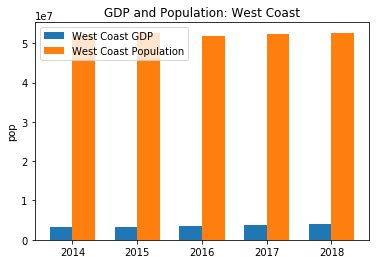

In [83]:
#West Coast GDP versus Population 

labels = ['2014', '2015','2016','2017','2018']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, west_final['West GDP'], width, label='West Coast GDP')
rects2 = ax.bar(x + width/2, new_total['West Coast Population'], width, label='West Coast Population')

#Add detail to chart
ax.set_ylabel('pop')
ax.set_title('GDP and Population: West Coast')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

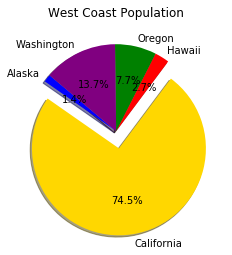

In [102]:
#Prepare pie chart for west coast population 
labels=['Alaska','California','Hawaii','Oregon','Washington']
sizes=[3689100,194733131,7108524,20088553,35769330]
colors=["blue","gold","red","green","purple"]

explode=(0,.2,0,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("West Coast Population")
plt.show()